In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [163]:
from google.colab import files
uploaded = files.upload()

Saving blacklist_whitelist.txt to blacklist_whitelist (5).txt


In [164]:
import csv
with open("blacklist_whitelist.txt", "r", encoding="utf-8") as txt_file:
    lines = txt_file.readlines()
rows = [line.strip().split("\t") for line in lines]

with open("blacklist_whitelist.csv", "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(rows)

print("csv")
import pandas as pd
df = pd.read_csv("blacklist_whitelist.csv")
df.head()

csv


,1,5/26/17,adios oil category whitelist/blacklist
Oil_Name,ADIOS_Oil_ID,Add_To,Remove_From
"""MTBE, EXXON""",AD00786,Other->Other,"""Gasoline, Kerosene, Light Products (Fuel Oil 1)"""
"""NAPHTHA CRACKING FRACTION, EXXON""",AD00803,Other->Other,"""Fuel Oil 2, Diesel, Heating Oil"""


In [165]:
df

,1,5/26/17,adios oil category whitelist/blacklist
Oil_Name,ADIOS_Oil_ID,Add_To,Remove_From
"""MTBE, EXXON""",AD00786,Other->Other,"""Gasoline, Kerosene, Light Products (Fuel Oil 1)"""
"""NAPHTHA CRACKING FRACTION, EXXON""",AD00803,Other->Other,"""Fuel Oil 2, Diesel, Heating Oil"""


In [166]:
df = pd.read_csv("blacklist_whitelist.csv", header=1)
print(df.columns.tolist())

['Oil_Name', 'ADIOS_Oil_ID', 'Add_To', 'Remove_From']


In [167]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ['Add_To', 'Oil_Name', 'ADIOS_Oil_ID', 'Remove_From']:
    df[col] = le.fit_transform(df[col])

In [168]:
x = df[['Oil_Name', 'ADIOS_Oil_ID', 'Add_To']].values
y=df['Remove_From'].values

In [169]:
x.shape

(2, 3)

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.2)

In [171]:
import tensorflow as tf

In [172]:
tf.keras

<module 'tensorflow.keras' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/__init__.py'>

In [173]:
from tensorflow.keras.models import Sequential

In [174]:
model = Sequential()
model.add(tf.keras.layers.Input(shape=(3,)))
model.add(tf.keras.layers.Dense(units = 30, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units = 15, activation='sigmoid'))

for i in range(3):
    model.add(tf.keras.layers.Dense(units = 50, activation='sigmoid'))

model.add(tf.keras.layers.Dense(units = 1))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_squared_error'])
history=model.fit(x_train,y_train,batch_size=32,epochs= 10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step - loss: 0.1887 - mean_squared_error: 0.1887
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0442 - mean_squared_error: 0.0442
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.6708e-04 - mean_squared_error: 5.6708e-04
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.7439e-04 - mean_squared_error: 2.7439e-04


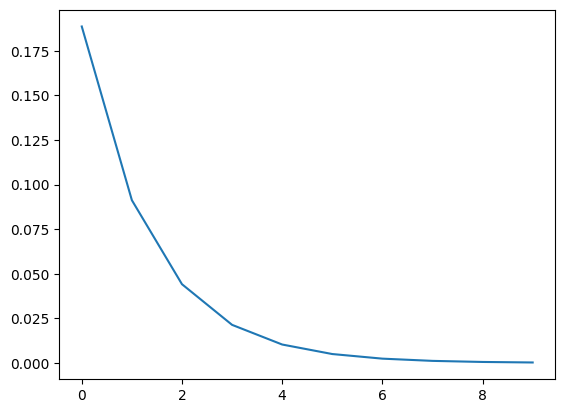

In [175]:
plt.plot(range(10),history.history['loss'])


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 867ms/step - loss: 9.1199e-04 - mean_squared_error: 9.1199e-04
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.6968e-04 - mean_squared_error: 7.6968e-04
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.4968e-04 - mean_squared_error: 6.4968e-04
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 5.4904e-04 - mean_squared_error: 5.4904e-04
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 4.6313e-04 - mean_squared_error: 4.6313e-04
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 3.8660e-04 - mean_squared_error: 3.8660e-04
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.2274e-04 - mean_squared_error: 3.2274e-04
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.6943e-04 - mean_squared_error: 2.6943e-04
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.2495e-04 - mean_squared_error: 2.2495e-04
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.8855e-04 - mean_squared_error:

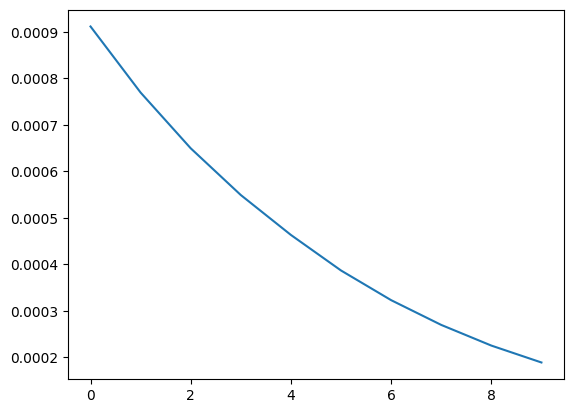

In [176]:
model=Sequential()
model.add(tf.keras.layers.Input(shape=(3,)))

model.add(tf.keras.layers.Dense(units=30,activation='relu'))
model.add(tf.keras.layers.Dense(units=15,activation='relu'))
for i in range(3):
  model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['mean_squared_error'])
history=model.fit(x_train,y_train,batch_size=32,epochs=10)
plt.plot(range(10),history.history['loss'])

In [178]:
def fit_model(optimizer:str='sgd'):
  model=Sequential()
  model.add(tf.keras.layers.Input(shape=(3,)))
  model.add(tf.keras.layers.Dense(units=30,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(units=15,activation='sigmoid'))
  model.add(tf.keras.layers.Dense(units=1))
  model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['mean_squared_error'])
  return model.fit(x_train,y_train,batch_size=32,epochs=10)

In [179]:
losses={}
optimizers=['sgd','adam','AdamW']
for optimizer in optimizers:
  history=fit_model(optimizer)
  losses[optimizer]=history.history['loss']



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0075 - mean_squared_error: 0.0075
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0061 - mean_squared_error: 0.0061
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0049 - mean_squared_error: 0.0049
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0040 - mean_squared_error: 0.0040
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0032 - mean_squared_error: 0.0032
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0026 - mean_squared_error: 0.0026
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0014 - mean

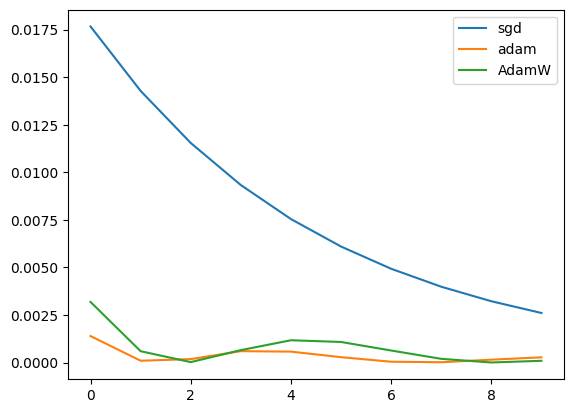

In [180]:
for name,loss in losses.items():
  plt.plot(loss,label=name)

plt.legend()